In [1]:
import numpy as np
import pandas as pd
import util
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense, Input

data_path = "../data/"

In [2]:
btc_pred = pd.read_csv(data_path+'bitcoin_y_pred.csv',encoding = "utf-8-sig", index_col=0)
btc_pred
# ew_pred = pd.read_csv(data_path+'ew_y_pred.csv',encoding = "utf-8-sig", index_col=0)
# ew_pred

,pred,return,remain,cumprod,actual_binary,pred_binary
date,,,,,,
2019-09-14 00:00:00+00:00,0.000462,0.003097,1.003097,1.003097,1,1
2019-09-15 00:00:00+00:00,0.000448,-0.001626,0.998374,1.001466,-1,1
2019-09-16 00:00:00+00:00,0.000411,-0.006254,0.993746,0.995203,-1,1
2019-09-17 00:00:00+00:00,0.000400,-0.004405,0.995595,0.990818,-1,1
2019-09-18 00:00:00+00:00,0.000418,-0.002125,0.997875,0.988713,-1,1
...,...,...,...,...,...,...
2024-03-17 00:00:00+00:00,0.000347,-0.017802,0.982198,3.390089,-1,1
2024-03-18 00:00:00+00:00,0.000370,0.010801,1.010801,3.426705,1,1
2024-03-19 00:00:00+00:00,0.000249,-0.051620,0.948380,3.249820,-1,1


In [6]:
predictions_classified_LSTM = btc_pred.pred_binary
y_test = btc_pred['return']
# y_test

# predictions_classified_LSTM

In [7]:
def calculate_cumulative_log_return(df):
    # This function calculates the cumulative sum of log returns.
    # This is done by cumulatively summing up the daily log returns.
    cumulative_log_return = df['log_return'].cumsum()
    
    return cumulative_log_return

def handle_y_test(y_test):
    y_test = pd.DataFrame(y_test)
    y_test = y_test.rename(columns={'return': 'log_return'})
    return y_test

# Assume a risk-free rate of 2% per annum and 252 trading days in a year
risk_free_rate = util.calculate_daily_risk_free_log_return(0.02, 252)

# Assume a beta of 1 for both y_test and y_pred
beta = 1

y_pred = y_test * predictions_classified_LSTM
# Calculate performance metrics for y_test
sharpe_ratio_test = util.calculate_sharpe_ratio(y_test, risk_free_rate)
treynor_ratio_test = util.calculate_treynor_ratio(y_test, risk_free_rate, beta)
jensens_alpha_test = util.calculate_jensens_alpha(y_test, y_test, risk_free_rate, beta)  # Here we use y_test as the market returns

# Calculate performance metrics for y_pred
sharpe_ratio_pred = util.calculate_sharpe_ratio(y_pred, risk_free_rate)
treynor_ratio_pred = util.calculate_treynor_ratio(y_pred, risk_free_rate, beta)
jensens_alpha_pred = util.calculate_jensens_alpha(y_pred, y_test, risk_free_rate, beta)  # Here we use y_test as the market returns

print(f"Performance metrics for y_test:\nSharpe Ratio: {sharpe_ratio_test}\nTreynor Ratio: {treynor_ratio_test}\nJensen's Alpha: {jensens_alpha_test}")
print(f"\nPerformance metrics for y_pred:\nSharpe Ratio: {sharpe_ratio_pred}\nTreynor Ratio: {treynor_ratio_pred}\nJensen's Alpha: {jensens_alpha_pred}")

Performance metrics for y_test:
Sharpe Ratio: 0.03764103041633905
Treynor Ratio: 0.0010516815394077037
Jensen's Alpha: 6.871548363792846e-22

Performance metrics for y_pred:
Sharpe Ratio: -0.0005774421256814298
Treynor Ratio: -1.6146770024741918e-05
Jensen's Alpha: -0.0010678283094324452


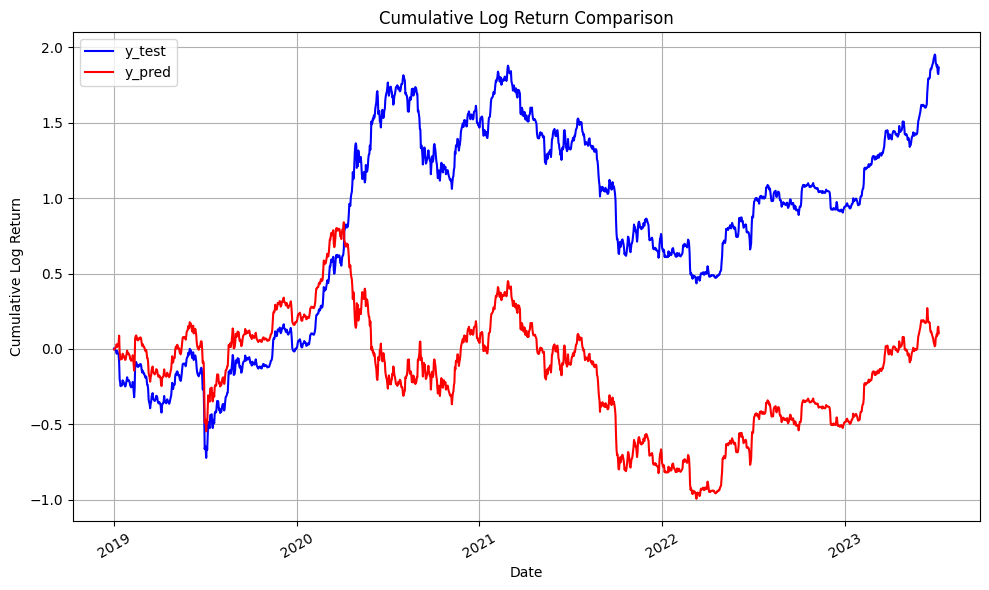

In [8]:
# Calculate the cumulative log return for both y_test and y_pred
cum_y_test = calculate_cumulative_log_return(handle_y_test(y_test))
cum_y_pred = calculate_cumulative_log_return(pd.DataFrame(y_pred, columns=['log_return']))

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the cumulative log return of y_test with a blue line
ax.plot(cum_y_test.index, cum_y_test, color='blue', linestyle='-')

# Plot the cumulative log return of y_pred with a red line
ax.plot(cum_y_pred.index, cum_y_pred, color='red', linestyle='-')

# Set the title and labels
ax.set_title('Cumulative Log Return Comparison')
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Log Return')

# Get the years from the index
years = [date.year for date in pd.to_datetime(cum_y_test.index)]

# Set the x-ticks to display years
ax.set_xticks(cum_y_test.index[::365])  # Assuming 365 days in a year
ax.set_xticklabels(years[::365], rotation=30)  # Rotate labels by 30 degrees

# Enable the grid
ax.grid(True)

# Add a legend
ax.legend(['y_test', 'y_pred'])
plt.tight_layout()

fig.savefig('result_btc.png')
# Show the plot
plt.show()